In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class EmployeeBehaviorSimulation:
    def __init__(self, size, num_employees, initial_motivation):
        self.size = size
        self.num_employees = num_employees
        self.grid = np.zeros((size, size), dtype=float)  # Initialize grid with all zeros (motivation)
        self.initialize_employees(initial_motivation)

    def initialize_employees(self, initial_motivation):
        # Randomly place employees on the grid with given initial motivation
        for _ in range(self.num_employees):
            x = random.randint(0, self.size - 1)
            y = random.randint(0, self.size - 1)
            self.grid[x, y] = initial_motivation

    def get_neighbor_indices(self, x, y):
        # Returns indices of neighbors of cell (x, y)
        indices = []
        for i in range(-1, 2):
            for j in range(-1, 2):
                if (i, j) != (0, 0):  # Exclude the cell itself
                    indices.append(((x + i) % self.size, (y + j) % self.size))
        return indices

    def update_grid(self, decay_rate):
        new_grid = np.copy(self.grid)
        for i in range(self.size):
            for j in range(self.size):
                motivation = self.grid[i, j]
                avg_neighbor_motivation = np.mean([self.grid[x, y] for x, y in self.get_neighbor_indices(i, j)])
                # Update motivation based on the average motivation of neighbors
                new_motivation = motivation + (avg_neighbor_motivation - motivation) * decay_rate
                new_grid[i, j] = min(1.0, max(0.0, new_motivation))  # Ensure motivation stays within [0, 1]
        self.grid = new_grid

    def plot_grid(self):
        plt.imshow(self.grid, cmap='viridis', vmin=0, vmax=1)
        plt.colorbar(label='Motivation')
        plt.title('Employee Behavior Simulation')
        plt.show()


In [11]:

size = 50
num_employees = 1000
initial_motivation = 0.5  # Initial motivation of employees
decay_rate = 0.1  # Rate at which motivation decays/adjusts based on neighbors
sim = EmployeeBehaviorSimulation(size, num_employees, initial_motivation)


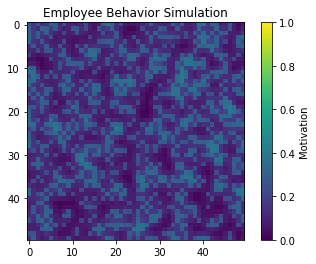

In [12]:
# Simulation steps
for _ in range(10):  # Run for 10 steps
    sim.update_grid(decay_rate)

# Plot the final grid
sim.plot_grid()